In [1]:
from __future__ import print_function

In [2]:
import sys
import subprocess
import json
import pandas as pd
sys.path.append('../build/')

In [3]:
%pylab inline
np.set_printoptions(precision=4, suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [4]:
import versor as vsr
import autodiff_multivector as ad
from motor_estimation import MotorEstimationSolver

In [5]:
ad.diff_ceres_rotor_gaalop(0.5, vsr.Vec(1,0,0))

[array([[ 0.8776],
        [ 0.4794],
        [ 0.    ]]), array([[-0.4794],
        [ 0.8776],
        [ 0.    ]])]

In [6]:
ad.diff_ceres_rotor_versor(0.5, vsr.Vec(1,0,0))

[array([[ 0.8776],
        [ 0.4794],
        [ 0.    ]]), array([[-0.4794],
        [ 0.8776],
        [ 0.    ]])]

In [7]:
import pprint
pp = pprint.PrettyPrinter()

In [8]:
def run_benchmarks(name, repetitions):
    proc = subprocess.Popen(['/home/game/game/build/benchmark', 
                             '--benchmark_format=json', 
                             '--benchmark_filter={}'.format(name),
                             '--benchmark_repetitions={}'.format(repetitions)],
                            stdout=subprocess.PIPE)
    stdout = proc.communicate()[0]
    return json.loads(stdout)

In [9]:
def num_statements_and_operations_from_status(status):
    line = status.splitlines()[3]
    statements = int(line.split(' ')[6])
    operations = int(line.split(' ')[11])
    return statements, operations

In [10]:
def benchmark_mean_stddev(benchmark):
    context = benchmark['context']
    mean = benchmark['benchmarks'][-2]
    mean_cpu_time = mean['cpu_time']
    mean_iterations = mean['iterations']
    mean_real_time = mean['real_time']
    stddev = benchmark['benchmarks'][-1]
    stddev_cpu_time = stddev['cpu_time']
    stddev_real_time = stddev['real_time']
    num_cpus = context['num_cpus']
    mhz_per_cpu = context['mhz_per_cpu']
    return mean_iterations, (mean_cpu_time, stddev_cpu_time), (mean_real_time, stddev_real_time), num_cpus, mhz_per_cpu

In [11]:
python -m SimpleHTTPServerdef benchmark_results(ad_library, ad_type, ga_library, jacobian_size, benchmark_name, num_repetitions, status=None):
    results = {}
#     results['name'] = benchmark_name
    benchmarks = run_benchmarks(benchmark_name, num_repetitions)
    if status is not None:
        num_statements, num_operations = num_statements_and_operations_from_status(status)
        results['num_statements'] = num_statements
        results['num_operations'] = num_operations
    iterations, cpu_time, real_time, num_cpus, mhz_per_cpu = benchmark_mean_stddev(benchmarks)
    results['mean_iterations'] = iterations
    results['cpu_time_mean'] = cpu_time[0]
    results['cpu_time_stddev'] = cpu_time[1]
    results['real_time_mean'] = real_time[0]
    results['real_time_stddev'] = real_time[1]
    results['ad_library'] = ad_library
    results['ad_type'] = ad_type
    results['ga_library'] = ga_library
    results['jacobian_size'] = jacobian_size
    results['num_cpus'] = num_cpus
    results['mhz_per_cpu'] = mhz_per_cpu
    return results

# Automatic Multivector Differentiation

In [13]:
results = []
num_repetitions = 2

In [42]:
results.append(benchmark_results('Adept', 'Forward', 'Matrix', (3,1), 'BM_AdeptRotorMatrixJacobianForward', 
                                 num_repetitions,
                                 ad.diff_adept_rotor_matrix_forward(0.5, vsr.Vec(1,0,0))[-1]))

In [43]:
results.append(benchmark_results('Adept', 'Reverse', 'Matrix',(3,1), 'BM_AdeptRotorMatrixJacobianReverse', 
                                 num_repetitions,
                                 ad.diff_adept_rotor_matrix_reverse(0.5, vsr.Vec(1,0,0))[-1]
                                ))

In [44]:
results.append(benchmark_results('Adept', 'Forward', 'Versor',(3,1), 'BM_AdeptRotorVersorJacobianForward', 
                                 num_repetitions,
                                 ad.diff_adept_rotor_versor_forward(0.5, vsr.Vec(1,0,0))[-1]))

In [45]:
results.append(benchmark_results('Adept', 'Reverse', 'Versor',(3,1), 'BM_AdeptRotorVersorJacobianReverse',
                                 num_repetitions,
                                 ad.diff_adept_rotor_versor_reverse(0.5, vsr.Vec(1,0,0))[-1]
                                ))

In [46]:
results.append(benchmark_results('Adept', 'Forward', 'HepGA',(3,1), 'BM_AdeptRotorHepGAJacobianForward', 
                                 num_repetitions,
                                 ad.diff_adept_rotor_hepga_forward(0.5, vsr.Vec(1,0,0))[-1]))

In [47]:
results.append(benchmark_results('Adept', 'Reverse', 'HepGA',(3,1), 'BM_AdeptRotorHepGAJacobianReverse', 
                                 num_repetitions,
                                 ad.diff_adept_rotor_hepga_reverse(0.5, vsr.Vec(1,0,0))[-1]))

In [48]:
results.append(benchmark_results('Ceres', 'Forward', 'HepGA',(3,1), 'BM_CeresRotorHepGAJacobian', num_repetitions))

In [49]:
results.append(benchmark_results('Ceres', 'Forward', 'Versor',(3,1), 'BM_CeresRotorVersorJacobian', num_repetitions))

In [50]:
results.append(benchmark_results('Ceres', 'Forward', 'Matrix',(3,1),'BM_CeresRotorMatrixJacobian', num_repetitions))

In [51]:
results.append(benchmark_results('Ceres', 'Forward', 'Versor',(5,8),'BM_CeresMotorSpinPointJacobian', num_repetitions))

In [52]:
results.append(benchmark_results('Adept', 'Forward', 'Versor',(5,8),'BM_AdeptMotorSpinPointJacobianForward', num_repetitions))

In [53]:
results.append(benchmark_results('Ceres', 'Forward', 'Versor',(3,4),'BM_CeresRotorSpinPointJacobian', num_repetitions))

In [54]:
results.append(benchmark_results('Adept', 'Forward', 'Versor',(3,4),'BM_AdeptRotorSpinPointJacobianForward', num_repetitions))

In [14]:
results.append(benchmark_results('Ceres', 'Forward', 'HepGA',(3,1), 'BM_CeresRotorGaalopJacobian', num_repetitions))

In [15]:
df_ad = pd.DataFrame(results)
df_ad.transpose()

0
ad_library          Ceres
ad_type           Forward
cpu_time_mean        1349
cpu_time_stddev        16
ga_library          HepGA
jacobian_size      (3, 1)
mean_iterations    486111
mhz_per_cpu          1306
num_cpus               12
real_time_mean       1352
real_time_stddev       18

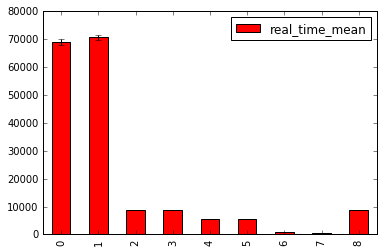

In [29]:
df_ad.plot(y='real_time_mean', yerr='real_time_stddev', kind='bar', color='red')
# df_ad.plot(y='cpu_time_mean', yerr='cpu_time_stddev', kind='bar')

# Motor Estimation
## Performance

In [67]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
print(motor)

Mot: [ 0.87 0 -0.5 0 -0.68 -0.43 -0.18 -0.25 ]


In [68]:
def benchmark_motor_estimation(n_points, num_linear_solver_threads, num_threads, 
                               parameterization='BIVECTOR_GENERATOR'):
    sigma = 0.09
    points_a = [vsr.Vec(*np.random.normal(0.0, 0.8, 3)).null() 
                for i in range(n_points)]
    points_b = [point.spin(motor) for point in points_a]
    points_b_noisy = [vsr.Vec(*(np.array(point)[:3] 
                                + sigma * np.random.randn(3))).null() 
                      for point in points_b]
    initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    mes = MotorEstimationSolver(initial_motor)
    for a, b in zip(points_a, points_b_noisy):
        mes.add_point_correspondences_residual_block(a,b)
    mes.set_parameterization(parameterization)
    mes.linear_solver_type = 'DENSE_QR'
    mes.num_linear_solver_threads = num_linear_solver_threads
    mes.num_threads = num_threads
    (estimated_motor, summary, motors) = mes.solve()
    results = {}
    results['initial_cost'] = summary['initial_cost']
    results['final_cost'] = summary['final_cost']
    results['num_iterations'] = len(summary['iterations'])
    results['num_residual_blocks'] = summary['num_residual_blocks']
    results['num_linear_solver_threads_given'] = summary['num_linear_solver_threads_given']
    results['num_threads_given'] = summary['num_threads_given']
    results['num_linear_solver_threads_used'] = summary['num_linear_solver_threads_used']
    results['num_threads_used'] = summary['num_threads_used']
    results['num_parameters'] = summary['num_parameters']
    results['num_effective_parameters'] = summary['num_effective_parameters']
    results['num_residuals'] = summary['num_residuals']
    results['jacobian_size'] = (results['num_residuals'], results['num_effective_parameters'])
    results['preprocessor_time'] = summary['preprocessor_time_in_seconds']
    results['residual_evaluation_time'] = summary['residual_evaluation_time_in_seconds']
    results['jacobian_evaluation_time'] = summary['jacobian_evaluation_time_in_seconds']
    results['linear_solver_time'] = summary['linear_solver_time_in_seconds']
    results['minimizer_time'] = summary['minimizer_time_in_seconds']
    results['postprocessor_time'] = summary['postprocessor_time_in_seconds']

    results['total_time'] = summary['total_time_in_seconds']
    return results

In [78]:
results = []
results.append(benchmark_motor_estimation(10,1,1))
results.append(benchmark_motor_estimation(10,1,1,'POLAR_DECOMPOSITION'))
results.append(benchmark_motor_estimation(1000,256,256))
results.append(benchmark_motor_estimation(1000,256,256,'POLAR_DECOMPOSITION'))
results.append(benchmark_motor_estimation(100000,1024,1024))
results.append(benchmark_motor_estimation(100000,1024,1024, 'POLAR_DECOMPOSITION'))

df = pd.DataFrame(results)
df.transpose()

0            1            2  \
final_cost                          0.114816    0.0577339      12.3107   
initial_cost                         15.8962       26.482         2142   
jacobian_evaluation_time         0.000287146  0.000331145    0.0165235   
jacobian_size                        (30, 6)      (30, 8)    (3000, 6)   
linear_solver_time                5.2225e-05  5.39841e-05  0.000935421   
minimizer_time                   0.000508534  0.000586927    0.0205498   
num_effective_parameters                   6            8            6   
num_iterations                             5            5            4   
num_linear_solver_threads_given            1            1          256   
num_linear_solver_threads_used             1            1          256   
num_parameters                             8            8            8   
num_residual_blocks                       10           10         1000   
num_residuals                             30           30         3000   
num_threads_given                          1            1          256   
num_threads_used                           1            1          256   
postprocessor_time               8.53802e-06   1.1879e-05   3.1954e-05   
preprocessor_time                 3.2447e-05   2.4943e-05  0.000169564   
residual_evaluation_time            4.88e-05   7.2204e-05   0.00265567   
total_time                       0.000549771  0.000623991    0.0207517   

                                           3            4            5  
final_cost                           12.2202      1213.04      1211.29  
initial_cost                         2171.92       214930       215536  
jacobian_evaluation_time           0.0163121     0.308518     0.349667  
jacobian_size                      (3000, 8)  (300000, 6)  (300000, 8)  
linear_solver_time                 0.0014785     0.108498     0.201971  
minimizer_time                     0.0218078     0.468631      0.61982  
num_effective_parameters                   8            6            8  
num_iterations                             5            4            5  
num_linear_solver_threads_given          256         1024         1024  
num_linear_solver_threads_used           256         1024         1024  
num_parameters                             8            8            8  
num_residual_blocks                     1000       100000       100000  
num_residuals                           3000       300000       300000  
num_threads_given                        256         1024         1024  
num_threads_used                         256         1024         1024  
postprocessor_time                2.8451e-05   0.00470262   0.00466447  
preprocessor_time                0.000213226    0.0231712    0.0236981  
residual_evaluation_time          0.00353446    0.0264006    0.0291163  
total_time                         0.0220497     0.496505     0.648183

In [72]:
results = [benchmark_motor_estimation(1000000, 1024, 1024) for i in range(1)]
df = pd.DataFrame(results)
df.transpose()

0
final_cost                            12147.4
initial_cost                      2.15125e+06
jacobian_evaluation_time              2.52328
jacobian_size                    (3000000, 6)
linear_solver_time                    1.48787
minimizer_time                        4.35896
num_effective_parameters                    6
num_iterations                              4
num_linear_solver_threads_given          1024
num_linear_solver_threads_used           1024
num_parameters                              8
num_residual_blocks                   1000000
num_residuals                         3000000
num_threads_given                        1024
num_threads_used                         1024
postprocessor_time                  0.0473199
preprocessor_time                     0.32147
residual_evaluation_time            0.0814388
total_time                            4.72775

In [74]:
results = [benchmark_motor_estimation(1000000, 2048, 2048, 'POLAR_DECOMPOSITION') for i in range(1)]
df = pd.DataFrame(results)
df.transpose()

0
final_cost                            12154.9
initial_cost                      2.15258e+06
jacobian_evaluation_time              3.27532
jacobian_size                    (3000000, 8)
linear_solver_time                    3.49807
minimizer_time                        7.27279
num_effective_parameters                    8
num_iterations                              5
num_linear_solver_threads_given          2048
num_linear_solver_threads_used           2048
num_parameters                              8
num_residual_blocks                   1000000
num_residuals                         3000000
num_threads_given                        2048
num_threads_used                         2048
postprocessor_time                  0.0468573
preprocessor_time                    0.240094
residual_evaluation_time             0.117803
total_time                            7.55974

In [71]:
(df['total_time'].mean(), df['total_time'].std())

(0.49561311580473555, 0.014081042572630365)

In [72]:
results = [benchmark_motor_estimation(100000, 1024,1024, 'POLAR_DECOMPOSITION') for i in range(10)]
df = pd.DataFrame(results)
df.transpose()
(df['total_time'].mean(), df['total_time'].std())

(0.66033865059434904, 0.01459742644416717)

In [73]:
df

final_cost   initial_cost  jacobian_evaluation_time jacobian_size  \
0  1212.388026  214686.678595                  0.344102   (300000, 8)   
1  1212.247764  214718.217145                  0.342964   (300000, 8)   
2  1216.511057  214876.465404                  0.345010   (300000, 8)   
3  1214.826707  215182.537102                  0.344307   (300000, 8)   
4  1216.120300  215319.762931                  0.342882   (300000, 8)   
5  1216.962387  215315.746295                  0.343021   (300000, 8)   
6  1215.363467  214623.836677                  0.347204   (300000, 8)   
7  1217.241708  215459.319171                  0.374208   (300000, 8)   
8  1220.354666  215123.675232                  0.345048   (300000, 8)   
9  1215.977945  215060.578854                  0.344257   (300000, 8)   

   linear_solver_time  minimizer_time  num_effective_parameters  \
0            0.217258        0.626744                         8   
1            0.217125        0.627171                         8   
2            0.217386        0.626004                         8   
3            0.216663        0.626665                         8   
4            0.217303        0.624427                         8   
5            0.216587        0.628748                         8   
6            0.217291        0.632592                         8   
7            0.228890        0.672964                         8   
8            0.217569        0.628218                         8   
9            0.216930        0.628732                         8   

   num_iterations  num_linear_solver_threads_given  \
0               5                             1024   
1               5                             1024   
2               5                             1024   
3               5                             1024   
4               5                             1024   
5               5                             1024   
6               5                             1024   
7               5                             1024   
8               5                             1024   
9               5                             1024   

   num_linear_solver_threads_used  num_parameters  num_residual_blocks  \
0                            1024               8               100000   
1                            1024               8               100000   
2                            1024               8               100000   
3                            1024               8               100000   
4                            1024               8               100000   
5                            1024               8               100000   
6                            1024               8               100000   
7                            1024               8               100000   
8                            1024               8               100000   
9                            1024               8               100000   

   num_residuals  num_threads_given  num_threads_used  postprocessor_time  \
0         300000               1024              1024            0.004486   
1         300000               1024              1024            0.004542   
2         300000               1024              1024            0.004662   
3         300000               1024              1024            0.004518   
4         300000               1024              1024            0.004636   
5         300000               1024              1024            0.004536   
6         300000               1024              1024            0.004675   
7         300000               1024              1024            0.004914   
8         300000               1024              1024            0.004707   
9         300000               1024              1024            0.004513   

   preprocessor_time  residual_evaluation_time  total_time  
0           0.023254                  0.026127    0.654485  
1           0.023078                  0.028050    0.654791  
2           0.023796 

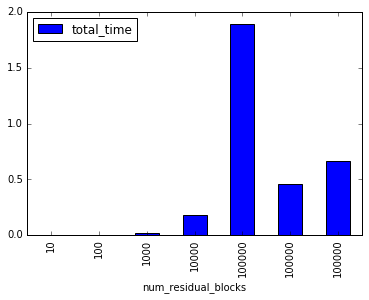

In [58]:
df.plot(x='num_residual_blocks', y='total_time', kind='bar')

In [16]:
n_points=10
sigma = 0.09
points_a = [vsr.Vec(*np.random.normal(0.0, 0.8, 3)).null() 
            for i in range(n_points)]
points_b = [point.spin(motor) for point in points_a]
points_b_noisy = [vsr.Vec(*(np.array(point)[:3] 
                            + sigma * np.random.randn(3))).null() 
                  for point in points_b]
initial_motor = vsr.Mot(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
mes = MotorEstimationSolver(initial_motor)
for a, b in zip(points_a, points_b_noisy):
    mes.add_point_correspondences_residual_block(a,b)
mes.set_parameterization('BIVECTOR_GENERATOR')
mes.linear_solver_type = 'DENSE_QR'
mes.num_linear_solver_threads = 1
mes.num_threads = 1
(estimated_motor, summary, motors) = mes.solve()
print(summary['full_report'])


Solver Summary (v 1.11.0-eigen-(3.2.92)-lapack-suitesparse-(4.4.6)-openmp)

                                     Original                  Reduced
Parameter blocks                            1                        1
Parameters                                  8                        8
Effective parameters                        6                        6
Residual blocks                            10                       10
Residual                                   30                       30

Minimizer                        TRUST_REGION

Dense linear algebra library            EIGEN
Trust region strategy     LEVENBERG_MARQUARDT

                                        Given                     Used
Linear solver                        DENSE_QR                 DENSE_QR
Threads                                     1                        1
Linear solver threads                       1                        1

Cost:
Initial                          2.049113e+01
Final              

In [18]:
pd.DataFrame(summary).transpose()

0  \
brief_report                         Ceres Solver Report: Iterations: 3, Initial co...   
final_cost                                                                   0.0706572   
full_report                          \nSolver Summary (v 1.11.0-eigen-(3.2.92)-lapa...   
initial_cost                                                                   20.4911   
iterations                           {u'cost_change': 0.0, u'eta': 0.1, u'trust_reg...   
jacobian_evaluation_time_in_seconds                                        0.000302564   
linear_solver_time_in_seconds                                               4.7649e-05   
linear_solver_type_used                                                       DENSE_QR   
message                              Function tolerance reached. |cost_change|/cost...   
minimizer_time_in_seconds                                                  0.000528568   
minimizer_type                                                            TRUST_REGION   
num_effective_parameters                                                             6   
num_linear_solver_threads_given                                                      1   
num_linear_solver_threads_used                                                       1   
num_parameter_blocks                                                                 1   
num_parameters                                                                       8   
num_residual_blocks                                                                 10   
num_residuals                                                                       30   
num_threads_given                                                                    1   
num_threads_used                                                                     1   
postprocessor_time_in_seconds                                               1.2651e-05   
preprocessor_time_in_seconds                                                3.9548e-05   
residual_evaluation_time_in_seconds                                         4.9387e-05   
total_time_in_seconds                                                      0.000581091   
trust_region_strategy_type                                         LEVENBERG_MARQUARDT   

                                                                                     1  \
brief_report                         Ceres Solver Report: Iterations: 3, Initial co...   
final_cost                                                                   0.0706572   
full_report                          \nSolver Summary (v 1.11.0-eigen-(3.2.92)-lapa...   
initial_cost                                                                   20.4911   
iterations                           {u'cost_change': 19.0391770568, u'eta': 0.0, u...   
jacobian_evaluation_time_in_seconds                                        0.000302564   
linear_solver_time_in_seconds                                               4.7649e-05   
linear_solver_type_used                                                       DENSE_QR   
message                              Function tolerance reached. |cost_change|/cost...   
minimizer_time_in_seconds                                                  0.000528568   
minimizer_type                                                            TRUST_REGION   
num_effective_parameters                                                             6   
num_linear_solver_threads_given                                                      1   
num_linear_solver_threads_used                                                       1   
num_parameter_blocks                                                                 1   
num_parameters                                                                       8   
num_residual_blocks                                                                 10   
num_residuals                                                                       30   
num_threads_given                 

In [16]:
time_10_1_1 = [benchmark_motor_estimation(10, 1,1) for i in range(1000)]
print(np.mean(time_10_1_1))
print(np.std(time_10_1_1))

0.00050008401298
9.47762783549e-05


In [31]:
time_100_4_4 = [benchmark_motor_estimation(10000, 128,32) for i in range(100)]
print(np.mean(time_100_4_4))
print(np.std(time_100_4_4))

0.0476819423995
0.00166339272053


In [18]:
# n_points = [10, 100, 1000, 10000, 100000]
n_points = [10]
n_linear_solver_threads = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
n_threads = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

In [19]:
res = {}
for i in n_points:
    for j in n_linear_solver_threads:
        for k in n_threads:
            total_time_in_seconds = benchmark_motor_estimation(i, j, k)
            res['{}_{}_{}'.format(i,j,k)] = total_time_in_seconds

In [20]:
print(res)

{'10_32_8': 0.025593224010663107, '10_2_1024': 0.041082893003476784, '10_1024_16': 0.0011323950020596385, '10_32_16': 0.0008658270089654252, '10_16_2048': 0.08148157800314948, '10_512_4': 0.00047682800504844636, '10_8_256': 0.009256713005015627, '10_128_2048': 0.0783414440084016, '10_512_2': 0.0061107290093787014, '10_64_2': 0.004629538001609035, '10_64_1': 0.0005250029935268685, '10_16_128': 0.007412380000459962, '10_64_4': 0.021858391002751887, '10_1024_8': 0.0005058050010120496, '10_64_8': 0.007026721999864094, '10_1024_4': 0.02503840198914986, '10_1024_2': 0.007055437003145926, '10_1024_1': 0.0005112130020279437, '10_256_32': 0.0012756069918395951, '10_64_256': 0.009087282000109553, '10_1_128': 0.013435982997179963, '10_4_16': 0.0009957559959730133, '10_2048_1': 0.0005131849902682006, '10_2_2048': 0.08146405201114248, '10_16_1024': 0.03737701699719764, '10_512_1024': 0.03114715698757209, '10_8_1024': 0.03170252501149662, '10_16_32': 0.0015387700113933533, '10_1024_64': 0.0025022150

In [21]:
summary['jacobian_evaluation_solver_time_in_seconds']

NameError: name 'summary' is not defined